In [51]:
from custom_llm import CustomLLM
from utils import poll_requests, setup_executer
from code_tool import CodeInterpreterFunctionTool
from langchain.memory import ConversationBufferMemory
from langchain_community.tools.tavily_search import TavilySearchResults
import os 


## Setup 

In [ ]:
# set enviroment variables for search tool, code interpretor sandbox VM, and llm 
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY", "")
os.environ["E2B_API_KEY"] = os.getenv("E2B_API_KEY", "")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY", "")

In [ ]:
# define tools to be used 
search = TavilySearchResults(
        max_results=2,
        include_answer=True,
        include_raw_content=True,
        include_images=True)

code_interpreter = CodeInterpreterFunctionTool()
code_interpreter_tool = code_interpreter.to_langchain_tool()
tools =[code_interpreter_tool, search]

# create thred to exectute in
config = {"configurable": {"thread_id": "cde123"}}

In [57]:
# create llm 
llm = CustomLLM(server_url="http://127.0.0.1:7002/v1/completions")

# create memory
memory = ConversationBufferMemory(
    llm=llm,
    memory_key="chat_history", # What dict key to use to parse in the agent
    return_messages=True,
    output_key="output")

# create agent
agent_executer = setup_executer(llm, memory, tools)

## Examples 

In [15]:
# code example
input_data =  {"input": "write code and produce a tsne plot of the iris dataset"}
result = list(agent_executer.stream(input_data))



> Entering new None chain...
Thought: I need to write Python code to load the iris dataset and create a t-SNE plot.

Action: code_interpreter
Action Input: 
```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)
plt.show()
```***Code Interpreting...

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)
plt.show()

====
{'results': [Result(<Figure size 640x480 with 1 Axes>)], 'stdout': [], 'stderr': [], 'error': None}I think I have the answer!

Final Answer: The code has been executed and a t-SNE plot of the iris data

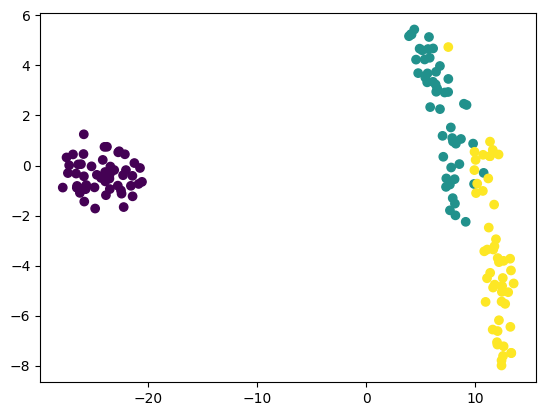

In [16]:
result[-1]["intermediate_steps"][0][1]["results"][0]

In [14]:
# code example 
input_data =  {"input": "write a function to check if 103 is even or odd and check"}
result = list(agent_executer.stream(input_data))



> Entering new None chain...
Thought: I need to write a Python function to check if a number is even or odd.

Action: code_interpreter
Action Input: ```
def is_even_or_odd(n):
    if n % 2 == 0:
        return f"{n} is even"
    else:
        return f"{n} is odd"

print(is_even_or_odd(103))
```***Code Interpreting...

def is_even_or_odd(n):
    if n % 2 == 0:
        return f"{n} is even"
    else:
        return f"{n} is odd"

print(is_even_or_odd(103))

====
{'results': [], 'stdout': ['103 is odd\n'], 'stderr': [], 'error': None}I have the answer!

Final Answer: 103 is odd.

> Finished chain.


In [26]:
# code example
input_data =  {"input": "plot a graph of log(x) in the range 0 to 1000"}
result = list(agent_executer.stream(input_data))



> Entering new None chain...
Thought: I need to write a Python code to plot a graph of log(x) in the range 0 to 1000 using a library like Matplotlib.

Action: code_interpreter
Action Input: ```
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 1000, 1000)
y = np.log(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('Graph of log(x) in the range 0 to 1000')
plt.show()
```***Code Interpreting...

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 1000, 1000)
y = np.log(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('Graph of log(x) in the range 0 to 1000')
plt.show()

====
{'results': [Result(<Figure size 640x480 with 1 Axes>)], 'stdout': [], 'stderr': [], 'error': None}Thought: I can see that the code has been executed successfully and a graph has been plotted. The observation result shows a figure size of 640x480 with 1 Axes, which means the graph is displayed.

Final Answer: The graph of log(x) in the range 

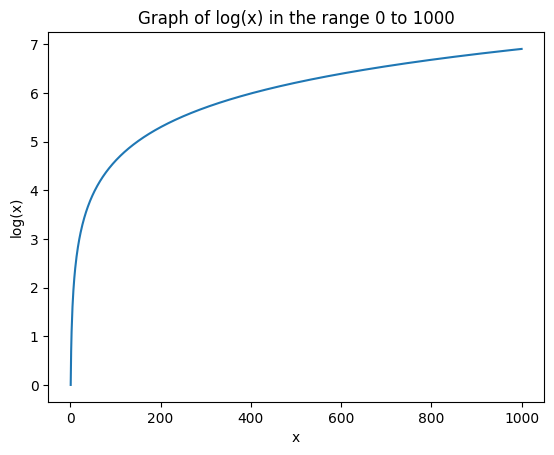

In [28]:
result[-1]["intermediate_steps"][0][1]["results"][0]
# result[-1]["intermediate_steps"][4][1]["results"][0]

In [ ]:
# search/code example 
input_data =  {"input": "what day is it tomorrow "}
result = list(agent_executer.stream(input_data))



> Entering new None chain...
Thought: I need to get the current date and then add one day to it to find out what day it is tomorrow.

Action: code_interpreter
Action Input: import datetime; print(datetime.date.today() + datetime.timedelta(days=1))***Code Interpreting...
import datetime; print(datetime.date.today() + datetime.timedelta(days=1))
====
{'results': [], 'stdout': ['2024-12-18\n'], 'stderr': [], 'error': None}Thought: I have the result of the code execution, which gives me the date of tomorrow. The output is in the format 'YYYY-MM-DD', but I need to convert it to a day of the week (e.g., Monday, Tuesday, etc.).

Action: code_interpreter
Action Input: import datetime; tomorrow = datetime.date.today() + datetime.timedelta(days=1); print(tomorrow.strftime("%A"))***Code Interpreting...
import datetime; tomorrow = datetime.date.today() + datetime.timedelta(days=1); print(tomorrow.strftime("%A"))
====
{'results': [], 'stdout': ['Wednesday\n'], 'stderr': [], 'error': None}Thought:

In [58]:
# search example
input_data =  {"input": "what is the current weather in toronto based on search"}
result = list(agent_executer.stream(input_data))



> Entering new None chain...
Thought: I need to search for the current weather in Toronto to answer this question.

Action: tavily_search_results_json
Action Input: "current weather in Toronto"
[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'Toronto', 'region': 'Ontario', 'country': 'Canada', 'lat': 43.6667, 'lon': -79.4167, 'tz_id': 'America/Toronto', 'localtime_epoch': 1734461310, 'localtime': '2024-12-17 13:48'}, 'current': {'last_updated_epoch': 1734461100, 'last_updated': '2024-12-17 13:45', 'temp_c': 6.2, 'temp_f': 43.2, 'is_day': 1, 'condition': {'text': 'Overcast', 'icon': '//cdn.weatherapi.com/weather/64x64/day/122.png', 'code': 1009}, 'wind_mph': 16.1, 'wind_kph': 25.9, 'wind_degree': 262, 'wind_dir': 'W', 'pressure_mb': 1018.0, 'pressure_in': 30.06, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 70, 'cloud': 100, 'feelslike_c': 2.0, 'feelslike_f': 35.5, 'windchill_c': 0.9, 'windchill_f': 33.6, 'heatindex_c': 5.4, 'heatindex_f': 41.7, 'dewpoint_c